In [1]:
get_ipython().system('pip install tensorflow keras scikit-learn matplotlib pandas pil')

ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
os.chdir('C:\Traffic')

In [4]:
data=[]
labels=[]
classes=43
cur_path=os.getcwd()

In [5]:
cur_path

'C:\\Traffic'

In [6]:
for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    for img in os.listdir(path):
        image = Image.open(path +'/'+img)
        image = image.resize((32,32))
        image = np.array(image)
        data.append(image)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)

In [7]:
#LOAD DATA AND LABELS

In [8]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [9]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [10]:
print(data.shape,labels.shape)

(39209, 32, 32, 3) (39209,)


In [11]:
x_train,x_test,y_train,y_test=train_test_split(data, labels, test_size=0.2, random_state=42)

In [12]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [13]:
#CONVERTING LABELS INTO ONEHOT ENCODING

In [14]:
y_train= to_categorical(y_train, 43)
y_test= to_categorical(y_test, 43)

In [16]:
model = Sequential() #Sequential Model

#ConvLayer(32 filters)
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
#ConvLayer(64 filters)
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
#Flatten
model.add(Flatten())
#Dense layer with 256 hidden units
model.add(Dense(256,activation='relu'))
model.add(Dropout(rate=0.5))
#Softmax layer for output
model.add(Dense(43,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train, batch_size=32, epochs=25, validation_data=(x_test,y_test))

Epoch 1/25
981/981 [==============================] - 417s 424ms/step - loss: 2.0807 - accuracy: 0.4505 - val_loss: 0.7994 - val_accuracy: 0.8319
Epoch 2/25
981/981 [==============================] - 404s 412ms/step - loss: 0.8784 - accuracy: 0.7340 - val_loss: 0.3775 - val_accuracy: 0.9070
Epoch 3/25
981/981 [==============================] - 380s 387ms/step - loss: 0.6299 - accuracy: 0.8080 - val_loss: 0.2222 - val_accuracy: 0.9350
Epoch 4/25
981/981 [==============================] - 390s 397ms/step - loss: 0.4699 - accuracy: 0.8551 - val_loss: 0.1490 - val_accuracy: 0.9589
Epoch 5/25
981/981 [==============================] - 389s 397ms/step - loss: 0.3898 - accuracy: 0.8799 - val_loss: 0.1772 - val_accuracy: 0.9533
Epoch 6/25
981/981 [==============================] - 398s 406ms/step - loss: 0.3414 - accuracy: 0.8978 - val_loss: 0.1086 - val_accuracy: 0.9725
Epoch 7/25
981/981 [==============================] - 406s 413ms/step - loss: 0.2901 - accuracy: 0.9151 - val_loss: 0.0965 -

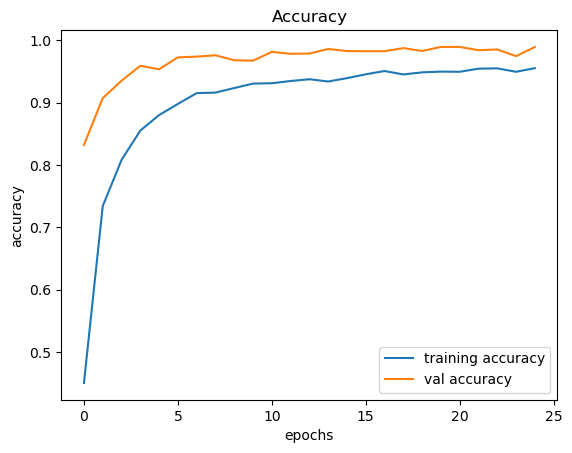

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

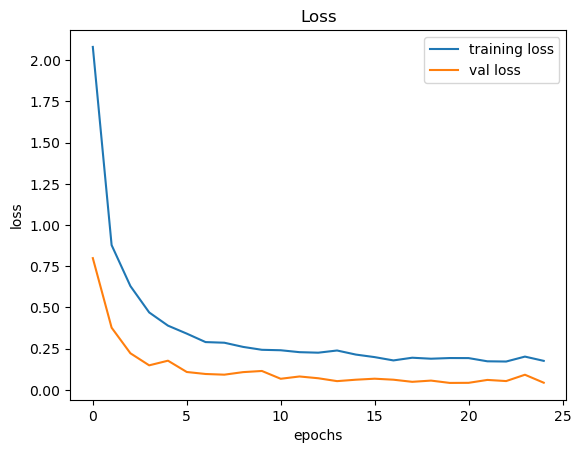

In [33]:
#Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
#TESTING ON TEST DATA

In [78]:
def testing(testcsv):
    y_test=pd.read_csv(testcsv)
    label=y_test['ClassId'].values
    imgs=y_test['Path'].values
    data=[]
    for img in imgs:
        image=Image.open(img)
        image=image.resize((32,32))
        data.append(np.array(image))
    x_test=np.array(data)
#     return x_test,label

In [84]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

395/395 [==============================] - 22s 55ms/step


In [85]:
# x_test, label = testing('Test.csv')

In [86]:
# y_pred= model.predict(x_test)
# y_pred = np.argmax(y_pred, axis=1)

In [87]:
# y_pred = np.argmax(x_test,axis=1)
# y_pred

In [88]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, y_pred))

0.9515439429928741


In [89]:
model.save('./training/TSR.h5')

In [1]:
from keras.models import load_model
model=load_model('./training/TSR.h5')

OSError: No file or directory found at ./training/TSR.h5

In [ ]:
classes={0: 'Speed limit (20km/h)',
         1: 'Speed limit (30km/h)',
         2: 'Speed limit (50km/h)',
         3: 'Speed limit (60km/h)',
         4: 'Speed limit (70km/h)',
         5: 'Speed limit (80km/h)',
         6: 'End of speed limit (80km/h)',
         7: 'Speed limit (100km/h)',
         8: 'Speed limit (120km/h)',
         9: 'No passing',
         10: 'No passing veh over 3.5 tons',
         11: 'Right-of-way at intersection',
         12: 'Priority road',
         13: 'Yield',
         14: ' Stop',
         15: 'No vehicles',
         16: 'Veh > 3.5 tons prohibited',
         17: 'No entry',
         18: 'General caution',
         19: 'Dengerous curve left',
         20: 'Dangerous curve right',
         21: 'Double curve',
         22: 'Bumpy road',
         23: 'Slippery road',
         24: 'Road narrows on the right',
         25: ' Road work',
         26: 'Traffic signals',
         27: ' Pedestrians',
         28: 'Children crossing',
         29: 'Bicycles crossing',
         30: 'Beware of ice/snow',
         31: 'Wild animals crossing',
         32: 'End speed + passing limits',
         33: 'Turn right ahead',
         34: 'Turn left ahead',
         35: 'Ahead only',
         36: 'straight or right',
         37: 'straight or left',
         38: 'Keep right',
         39: 'Keep left',
         40: ' Roundabout mandatory',
         41: 'End of no passing',
         42: 'End no passing veh > 3.5 tons'
        }

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image=Image.open(img)
    image=image.resize((32,32))
    data.append(np.array(image))
    x_test=np.array(data)
    y_pred=np.argmax(model.predict(x_test), axis=-1)
    return image,y_pred

In [ ]:
plot,prediction=test_on_img(r'C:\Traffic\Test\00078.png')
s=[str(i) for i in prediction]
a= int("".join(s))
print("Prediction traffic sign is: ",classes[a])
plt.imshow(plot)
plt.show()